# Explore vertical stratification in CREG exps. 

In [412]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import ticker

%matplotlib inline

In [413]:
def DEF_MOOR_BOX(CONFIG,box2sel):
    if CONFIG == 'CREG12.L75':
                # Set the range of values for variables to plot Z-Time
                print ' >>>>>>>>>>        Use the CREG12.L75 coordinates for moorings'
                # Define a ARC_A box or point
                bx_ARC_A={'name':'ARC-A','imin':572,'imax':572,'jmin':1541,'jmax':1541,'depthlim':(-500.,0.),'box':'ARC-B',
                          'templim':(-2.,2.,0.2),'sallim':(29.,35,0.2),
                          'Wlim':(-5.,5.,1.),'Kzlim':(-7.,-5.,0.25),'Sig0lim':(22.,27.5,0.5),
                          'N2lim':(0,5e-4,1e-5)
                         }
                # ./cdffindij -149.58 -149.58 75. 75. -c coordinates_CREG12_lbclnk_noz_vh20160930.nc
                #  dl_dis=    0.560 km
                #      573       573      1542      1542
                # 210.4246  210.4246   75.0049   75.0049
                
                # Define a ARC_B box or point
                bx_ARC_B={'name':'ARC-B','imin':627,'imax':627,'jmin':1482,'jmax':1482,'depthlim':(-500.,0.),'box':'ARC-B',
                          'templim':(-2.,2.,0.2),'sallim':(29.,35,0.2),
                          'Wlim':(-5.,5.,1.),'Kzlim':(-7.,-5.,0.25),'Sig0lim':(22.,27.5,0.5),
                          'N2lim':(0,5e-4,1e-5)
                         }
                # ./cdffindij -150. -150. 78. 78. -c coordinates_CREG12_lbclnk_noz_vh20160930.nc
                #  dl_dis=    1.758 km
                #      627       627      1482      1482
                # 210.0240  210.0240   78.0150   78.0150

                # Define a ARC_C box or point
                bx_ARC_C={'name':'ARC-C','imin':550,'imax':550,'jmin':1466,'jmax':1466,'depthlim':(-500.,0.),'box':'ARC-B',
                          'templim':(-2.,2.,0.2),'sallim':(29.,35,0.2),
                          'Wlim':(-5.,5.,1.),'Kzlim':(-7.,-5.,0.25),'Sig0lim':(22.,27.5,0.5),
                          'N2lim':(0,5e-4,1e-5)
                         }
                # ./cdffindij -139.54 -139.54 76.59 76.59 -c coordinates_CREG12_lbclnk_noz_vh20160930.nc
                #  dl_dis=    0.997 km
                #      551       551      1467      1467
                # 220.4900  220.4900   76.5957   76.5957
                                
                # Define a Eurasian mooring in the "middle" of this basin
                bx_EUR_B={'name':'EUR-B','imin':992,'imax':992,'jmin':1214,'jmax':1214,'depthlim':(-1000.,0.),'box':'EUR-B',
                          'templim':(-2.,3.,0.5),'sallim':(33.,36.,0.1),
                          'Wlim':(-5.,5.,1.),'Kzlim':(-7.,-5.,0.25),'Sig0lim':(26.5,28.5,0.05),
                          'N2lim':(0,5e-4,1e-5)
                         }
                # ./cdffindij 60. 60. 85.0 85.0 -c coordinates_CREG12_lbclnk_noz_vh20160930.nc -p T
                #   dl_dis=    1.091 km
                #       992       992      1214      1214
                #   60.0968   60.0968   85.0050   85.0050
                
    if CONFIG == 'CREG025.L75':
                print ' >>>>>>>>>>        Use the CREG025.L75 coordinates for moorings'           
                # Define a ARC_B box or point
                bx_ARC_A={'name':'ARC-A','imin':191,'imax':191,'jmin':515,'jmax':515,'depthlim':(-500.,0.),'box':'ARC-B',
                          'templim':(-2.,2.,0.2),'sallim':(29.,35,0.2),
                          'Wlim':(-5.,5.,1.),'Kzlim':(-7.,-5.,0.25),'Sig0lim':(22.,27.5,0.5),
                          'N2lim':(0,5e-4,1e-5)
                         }
                # ./cdffindij -149.58 -149.58 75. 75. -c  CREG025.L75_coordinates.nc -p T 
                #  dl_dis=    2.406 km
                #      192       192       516       516
                # 210.4358  210.4358   74.9787   74.9787
                bx_ARC_B={'name':'ARC-B','imin':210,'imax':210,'jmin':496,'jmax':496,'depthlim':(-500.,0.),'box':'ARC-B',
                          'templim':(-2.,2.,0.2),'sallim':(29.,35,0.2),
                          'Wlim':(-5.,5.,1.),'Kzlim':(-7.,-5.,0.25),'Sig0lim':(22.,27.5,0.5),
                          'N2lim':(0,5e-4,1e-5)
                         }
                # ./cdffindij -150. -150. 78. 78. -c  CREG025.L75_coordinates.nc -p T 
                #    dl_dis=    1.435 km
                #        210       210       496       496
                #   210.0315  210.0315   77.9889   77.9889
                
                bx_ARC_C={'name':'ARC-C','imin':184,'imax':184,'jmin':490,'jmax':490,'depthlim':(-500.,0.),'box':'ARC-B',
                          'templim':(-2.,2.,0.2),'sallim':(29.,35,0.2),
                          'Wlim':(-5.,5.,1.),'Kzlim':(-7.,-5.,0.25),'Sig0lim':(22.,27.5,0.5),
                          'N2lim':(0,5e-4,1e-5)
                         }
                # ./cdffindij -139.54 -139.54 76.59 76.59 -c  CREG025.L75_coordinates.nc -p T 
                #  dl_dis=    2.120 km
                #      185       185       491       491
                # 220.3823  220.3823   76.5962   76.5962
                
                # Define a Eurasian mooring in the "middle" of this basin
                bx_EUR_B={'name':'EUR-B','imin':332,'imax':332,'jmin':406,'jmax':406,'depthlim':(-1000.,0.),'box':'EUR-B',
                          'templim':(-2.,3.,0.5),'sallim':(33.,36.,0.5),
                          'Wlim':(-5.,5.,1.),'Kzlim':(-7.,-5.,0.25),'Sig0lim':(26.5,28.5,0.05),
                          'N2lim':(0,5e-4,1e-5)
                         }
                #.\cdfwhereij 60 60 85 85 -c CREG025.L75_coordinates.nc
                # Type of point   : T
                #  dl_dis=    4.787 km
                #      332       332       406       406
                #  59.7941   59.7941   84.9609   84.9609
  
    if box2sel == 'ARCA':
        sbox=bx_ARC_A
    elif box2sel == 'ARCB':
        sbox=bx_ARC_B
    elif box2sel == 'ARCC':
        sbox=bx_ARC_C
    elif box2sel == 'EURA':
        sbox=bx_EUR_B

       
    return sbox

In [414]:
# Funtion to compute the N2, duplicated from the CDFTOOLS eosbn2.f90
def bn2(ptem,psal,pdep,pe3w):
    print ptem.shape
    zgrav=9.81
    bn2=np.ones(ptem.shape)*np.nan
    for jk in set(np.arange(73)+1):
          zh = pdep[jk]
          zgde3w = zgrav / pe3w[jk]
          zt = 0.5 * ( ptem[jk,:] + ptem[jk+1,:] )          # potential temperature at w-point
          zs = 0.5 * ( psal[jk,:] + psal[jk+1,:] ) - 35.0   # salinity anomaly (s-35) at w-point

          zalbet = ( ( ( - 0.255019e-07 * zt + 0.298357e-05 ) * zt    \
                                             - 0.203814e-03 ) * zt    \
                                             + 0.170907e-01 ) * zt    \
                  + 0.665157e-01                                      \
                  +     ( - 0.678662e-05 * zs                         \
                          - 0.846960e-04 * zt + 0.378110e-02 ) * zs   \
                  +   ( ( - 0.302285e-13 * zh                         \
                          - 0.251520e-11 * zs                         \
                          + 0.512857e-12 * zt * zt           ) * zh   \
                          - 0.164759e-06 * zs                         \
                       +(   0.791325e-08 * zt - 0.933746e-06 ) * zt   \
                                              + 0.380374e-04 ) * zh

          zbeta  = ( ( -0.415613e-09 * zt + 0.555579e-07 ) * zt       \
                                          - 0.301985e-05 ) * zt       \
                  + 0.785567e-03                                      \
                  + (     0.515032e-08 * zs                           \
                        + 0.788212e-08 * zt - 0.356603e-06 ) * zs     \
                  +(  (   0.121551e-17 * zh                           \
                        - 0.602281e-15 * zs                           \
                        - 0.175379e-14 * zt + 0.176621e-12 ) * zh     \
                                            + 0.408195e-10   * zs     \
                    + ( - 0.213127e-11 * zt + 0.192867e-09 ) * zt     \
                                            - 0.121555e-07 ) * zh

          bn2[jk,:]     = zgde3w * zbeta                              \
                         * ( zalbet * ( ptem[jk,:] - ptem[jk+1,:] )   \
                                    - ( psal[jk,:] - psal[jk+1,:] ) )


    return bn2


>>>>> # Functions END  

In [415]:
CONFIG='CREG025.L75' ; CASE='BCTTWINERA5SSNVC'
#CONFIG='CREG025.L75' ; CASE='BCTTWINERA5SS'

#CONFIG='CREG12.L75' ; CASE='REF08'
#CONFIG='CREG12.L75' ; CASE='REF02'


CONFCASE=CONFIG+'-'+CASE

# Select the Box to treat
mybox='ARCA'  # Either ARCB or EURA 
box=DEF_MOOR_BOX(CONFIG,mybox)

s_year=1990 ; e_year=2010
RYEAR=str(s_year)+'-'+str(e_year)

 >>>>>>>>>>        Use the CREG025.L75 coordinates for moorings


In [416]:
box

{'Kzlim': (-7.0, -5.0, 0.25),
 'N2lim': (0, 0.0005, 1e-05),
 'Sig0lim': (22.0, 27.5, 0.5),
 'Wlim': (-5.0, 5.0, 1.0),
 'box': 'ARC-B',
 'depthlim': (-500.0, 0.0),
 'imax': 191,
 'imin': 191,
 'jmax': 515,
 'jmin': 515,
 'name': 'ARC-A',
 'sallim': (29.0, 35, 0.2),
 'templim': (-2.0, 2.0, 0.2)}

## Read vertical grid 

In [417]:
ds_zgr=xr.Dataset()
ds_zgr=xr.open_dataset('./GRID/'+CONFIG+'_mesh_zgr.nc',autoclose=True)


In [418]:
ds_zgr

<xarray.Dataset>
Dimensions:       (t: 1, x: 528, y: 603, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    mbathy        (t, y, x) int16 ...
    misf          (t, y, x) int16 ...
    isfdraft      (t, y, x) float32 ...
    e3t_0         (t, z, y, x) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    gdept_0       (t, z, y, x) float32 ...
    gdepu         (t, z, y, x) float32 ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_zgr.nc
    TimeStamp:  31/03/2017 16:28:45 +0200

In [419]:
# Select the mooring location only
e3w_0=np.array(np.squeeze(ds_zgr.e3w_0.isel(y=slice(box['jmin'],box['jmax']+1),x=slice(box['imin'],box['imax']+1))))
gdepw_0=np.array(np.squeeze(ds_zgr.gdepw_0.isel(y=slice(box['jmin'],box['jmax']+1),x=slice(box['imin'],box['imax']+1))))

>>> 

## Read the time series data 

In [420]:
ds_read=xr.Dataset()
ds_read=xr.open_dataset('./DATA/'+CONFCASE+'_MOOR-'+box['name']+'_y20192018.nc')

IOError: [Errno 2] No such file or directory: '/Users/ctalandi/TOOLS/My_PYTHON/ARCTIC/Z-STRATIFICATION/DATA/CREG025.L75-BCTTWINERA5SSNVC_MOOR-ARC-A_y20192018.nc'

In [ ]:
ds_read

In [ ]:
# Get a 2D depw field for ploting N2 
gdepw_0time=npy.reshape(gdepw_0,(gdepw_0.size,1))
gdepw_02D = npy.repeat(-gdepw_0time,ds_read.dims['time'],axis=1)
gdepw_02D.shape

In [ ]:
# Required to for 2D plots
ds_read['z']=np.squeeze(ds_read.Depth2D[:,0])
ds_read['time']=np.squeeze(ds_read.Time2D[0,:])

ds_read.set_coords('z',inplace=True)
ds_read.set_coords('time',inplace=True)

# Compute the N2 field

In [ ]:
ds_read['zw']=-gdepw_0
ds_read['N2']=(('zw','time'),bn2(np.array(ds_read.Temp),np.array(ds_read.Sal),gdepw_0,e3w_0)  )

In [ ]:
ds_read

## Plot T\S & N2 vertical profiles 

In [ ]:
plt.figure(figsize=(20,15)) 

plt.subplot(311)
myvmin=box['templim'][0]   ; myvmax=box['templim'][1]
ds_read.Temp.sel(z=slice(-500.0)).plot.contourf(vmin=myvmin,vmax=myvmax,levels=11,cmap='Spectral_r')
C=ds_read.Temp.sel(z=slice(-500.0)).plot.contour(vmin=myvmin,vmax=myvmax,levels=[-1.,0.,1.,2.],colors='k')
plt.clabel(C,fontsize=12,fmt='%4.1f')
plt.title(CONFCASE+' T, S, N2 vertical profiles @ mooring '+box['name'])
plt.xlabel('Years')
plt.ylabel('Depth (m)')
plt.grid(True)

#------------------------------------------------------
plt.subplot(312)
myvmin=box['sallim'][0]   ; myvmax=box['sallim'][1]
mylev=(myvmax-myvmin)+1
if box['name'] == 'EURA' : mylev=(myvmax-myvmin)*2
myvmin
myvmax
ds_read.Sal.sel(z=slice(-500.0)).plot.contourf(vmin=myvmin,vmax=myvmax,levels=mylev,cmap='rainbow')
C=ds_read.Sal.sel(z=slice(-500.0)).plot.contour(vmin=myvmin,vmax=myvmax,levels=[31.,33.,34.8],colors='k')
plt.clabel(C,fontsize=12,fmt='%4.1f')
plt.xlabel('Years')
plt.ylabel('Depth (m)')
plt.grid(True)

#------------------------------------------------------
plt.subplot(313)
myvmin=box['N2lim'][0]   ; myvmax=box['N2lim'][1]
myvmin
myvmax

ds_read.N2.sel(zw=slice(-500.0)).plot.contourf(vmin=myvmin,vmax=myvmax,cmap='Spectral_r')
C=ds_read.N2.sel(zw=slice(-500.0)).plot.contour(vmin=myvmin,vmax=myvmax,levels=[2e-4],colors='k')
plt.clabel(C,fontsize=12,fmt='%4.1e')
plt.xlabel('Years')
plt.ylabel('Depth (m)')
plt.grid(True)

doSfig=False
if doSfig : plt.savefig('./FIGURES/'+CONFCASE+'_MOOR-'+box['name']+'_ZTSN2_y'+str(np.int(ds_read.Time2D[0,0]))+str(np.int(ds_read.Time2D[0,-1]))+'.pdf')

In [405]:
plt.contourf?

array([-2.0000000e+00, -1.8000000e+00, -1.6000000e+00, -1.4000000e+00,
       -1.2000000e+00, -1.0000000e+00, -8.0000000e-01, -6.0000000e-01,
       -4.0000000e-01, -2.0000000e-01, -4.4408921e-16,  2.0000000e-01,
        4.0000000e-01,  6.0000000e-01,  8.0000000e-01,  1.0000000e+00,
        1.2000000e+00,  1.4000000e+00,  1.6000000e+00,  1.8000000e+00,
        2.0000000e+00])

-2.0

2.0

[None, None, None, None, None, None, None, None, None, None, None]

<a list of 21 text.Text objects>

(1995, 2018)

(-500.0, 0.0)

array([27. , 27.2, 27.4, 27.6, 27.8, 28. , 28.2, 28.4, 28.6, 28.8, 29. ,
       29.2, 29.4, 29.6, 29.8, 30. , 30.2, 30.4, 30.6, 30.8, 31. , 31.2,
       31.4, 31.6, 31.8, 32. , 32.2, 32.4, 32.6, 32.8, 33. , 33.2, 33.4,
       33.6, 33.8, 34. , 34.2, 34.4, 34.6])

<a list of 3 text.Text objects>

(1995, 2018)

(-500.0, 0.0)

[None, None, None, None, None, None, None, None]

(1995, 2018)

(-500.0, 0.0)

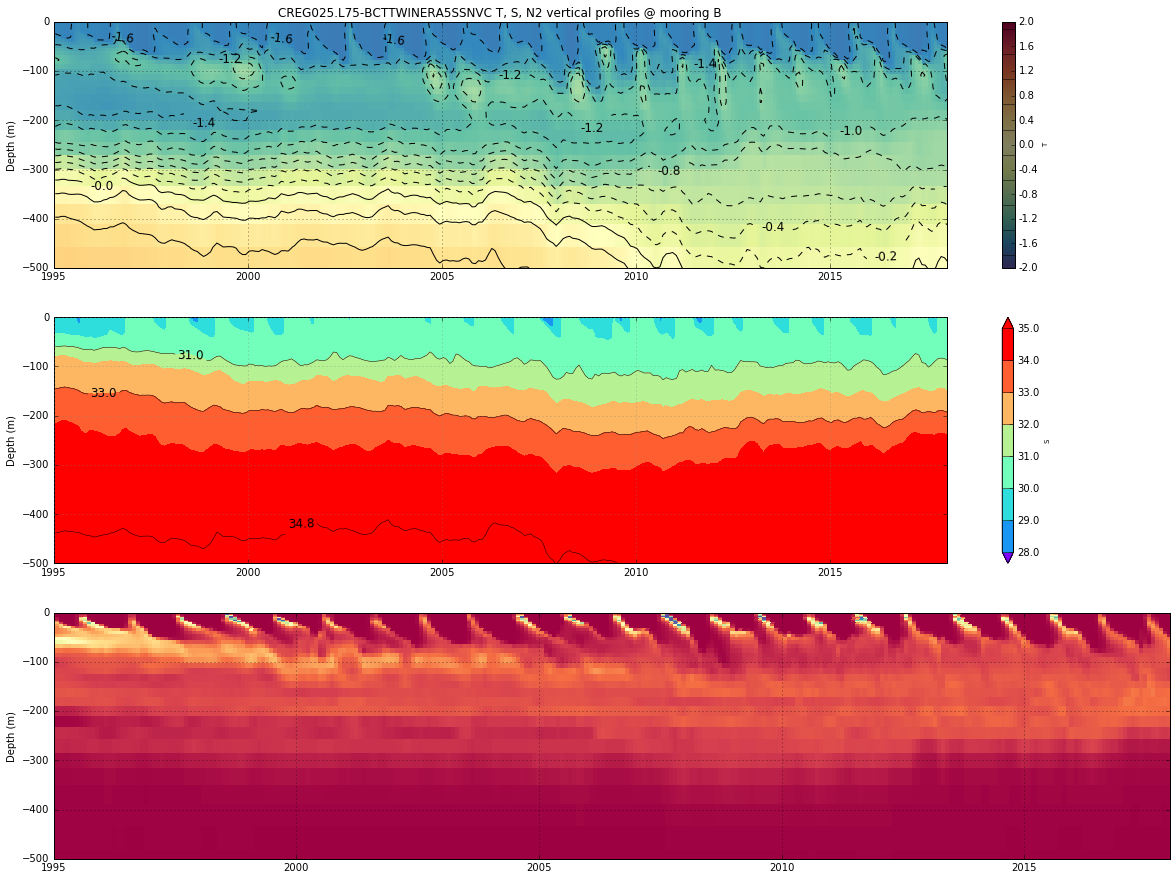

In [202]:
plt.figure(figsize=(20,15)) 

plt.subplot(311)
plt.title(CONFCASE+' T, S, N2 vertical profiles @ mooring B')
myvmin=box['templim'][0]   ; myvmax=box['templim'][1]  ;  myvint=box['templim'][2]
mycnt=np.arange(myvmin,myvmax+myvint,myvint)
mynorm = mpl.colors.Normalize(vmin=myvmin, vmax=myvmax)
C=plt.pcolormesh(ds_read.Time2D,ds_read.Depth2D,ds_read.Temp,vmin=myvmin,vmax=myvmax,norm=mynorm,cmap='Spectral_r')
#plt.contourf(ds_read.Time2D,ds_read.Depth2D,ds_read.Temp,contours=mycnt,cmap='Spectral_r',extend='both')
#plt.contourf(ds_read.Time2D,ds_read.Depth2D,ds_read.Temp,contours=mycnt,norm=mynorm,cmap='Spectral_r',extend='both')
#plt.colorbar()

cbar=plt.colorbar(C,format='%.1f',orientation='vertical',drawedges=True)
cbar.set_label('T',fontsize=7)
cl = plt.getp(cbar.ax, 'ymajorticklabels')
plt.setp(cl, fontsize=10)

CS=plt.contour(ds_read.Time2D,ds_read.Depth2D,ds_read.Temp,levels=mycnt,linewidths=1., colors='k')
#CS=plt.contour(ds_read.Time2D,ds_read.Depth2D,ds_read.Temp,levels=[-1.,0.,1.,2.],linewidths=1., colors='k')

plt.clabel(CS,fontsize=12,fmt='%4.1f')
plt.xlim([np.int(ds_read.Time2D[0,0]),np.int(ds_read.Time2D[0,-1])])
plt.ylim(box['depthlim'])
plt.grid(True)
plt.ylabel('Depth (m)')



#########################################
plt.subplot(312)
vmin=box['sallim'][0]   ; vmax=box['sallim'][1]  ;  vint=box['sallim'][2]
mycnt=np.arange(vmin,vmax+vint,vint)
mycnt

mynorm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

C=plt.contourf(ds_read.Time2D,ds_read.Depth2D,ds_read.Sal,contours=mycnt,norm=mynorm,cmap='rainbow',extend='both')
CS=plt.contour(ds_read.Time2D,ds_read.Depth2D,ds_read.Sal,levels=[31.,33.,34.8],linewidths=0.5,colors='k')

plt.clabel(CS,fontsize=12,fmt='%4.1f')
plt.xlim([np.int(ds_read.Time2D[0,0]),np.int(ds_read.Time2D[0,-1])]);
plt.ylim(box['depthlim']);
plt.grid(True,color='grey');
plt.ylabel('Depth (m)');

cbar=plt.colorbar(C,format='%.1f',orientation='vertical',drawedges=True)
cbar.set_label('S',fontsize=7)
cl = plt.getp(cbar.ax, 'ymajorticklabels')
plt.setp(cl, fontsize=10)

#########################################
plt.subplot(313)
plt.pcolormesh(ds_read.Time2D,gdepw_02D,N2,vmin=0.,vmax=1e-3,cmap='Spectral')
#plt.contour(ds_read.Time2D,ds_read.Depth2D,ds_read.Sal,contours=[34.8,34.8],colors='k')
#plt.contour(ds_read.Time2D,ds_read.Depth2D,ds_read.Temp,contours=np.arange(10)*0.5+30.,colors='k')
plt.xlim([np.int(ds_read.Time2D[0,0]),np.int(ds_read.Time2D[0,-1])])
plt.ylim(box['depthlim']);
plt.grid(True);
plt.ylabel('Depth (m)');



doSfig=True
if doSfig : plt.savefig('./FIGURES/'+CONFCASE+'_ZTSN2_y'+str(np.int(ds_read.Time2D[0,0]))+str(np.int(ds_read.Time2D[0,-1]))+'.pdf')

In [206]:
ds_read.Temp.plot?